In [1]:
getwd()

[1] "/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/GENE_EXPRESSION/MOUSE/STROKE/2022_Zheng_K_et_al/28_10_24"

In [2]:
here::here()

[1] "/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/GENE_EXPRESSION/MOUSE/STROKE/2022_Zheng_K_et_al/28_10_24"

===========================================================================================================

I will got with bmy default global R library which contains the schard package to convert anndata to seurat.

Info about package:

"This package allows one to load scanpy h5ad into R as list, SingleCellExperiment or Seurat object.\
For now it only loads X, obs, var, obsm (as reduced dimensions) if requested and images for visium data.\
The package is based on rhdf5 for h5ad manipulation and is pure R (that is reticulate-free).
"

It can load only one matrix from any layers of anndata object, the one stored as adata.X.
If it contains normalized counts, for instance, the consequent seurat object will have this\
matrix in counts and dataq layers.

In [3]:
library(Seurat)

Loading required package: SeuratObject

Loading required package: sp

'SeuratObject' was built under R 4.4.1 but the current version is
4.4.2; it is recomended that you reinstall 'SeuratObject' as the ABI
for R may have changed


Attaching package: 'SeuratObject'


The following objects are masked from 'package:base':

    intersect, t




In [4]:
library(schard)

In [5]:
list.files(here::here('python_objects'))     

[1] "GSE174574_combined.h5ad" "adata_preprocessed.h5ad"
[3] "adata_scvi.h5ad"

In [8]:
# zheng_k_seurat <- schard::h5ad2seurat(here::here('python_objects', 'adata_scvi.h5ad'))

In [10]:
zheng_k_seurat

An object of class Seurat 
19707 features across 58528 samples within 1 assay 
Active assay: RNA (19707 features, 0 variable features)
 2 layers present: counts, data
 4 dimensional reductions calculated: Xpca_, XscVI_, XscVImde_, Xumap_

In [12]:
zheng_k_seurat[[]] |> colnames() |> print()

 [1] "orig.ident"                  "nCount_RNA"                 
 [3] "nFeature_RNA"                "_index"                     
 [5] "sample"                      "n_genes_by_counts"          
 [7] "log1p_n_genes_by_counts"     "total_counts"               
 [9] "log1p_total_counts"          "pct_counts_in_top_50_genes" 
[11] "pct_counts_in_top_100_genes" "pct_counts_in_top_200_genes"
[13] "pct_counts_in_top_500_genes" "total_counts_mt"            
[15] "log1p_total_counts_mt"       "pct_counts_mt"              
[17] "total_counts_ribo"           "log1p_total_counts_ribo"    
[19] "pct_counts_ribo"             "total_counts_hb"            
[21] "log1p_total_counts_hb"       "pct_counts_hb"              
[23] "n_genes"                     "doublet_score"              
[25] "predicted_doublet"           "status"                     
[27] "leiden"                      "_scvi_batch"                
[29] "_scvi_labels"               


In [13]:
my_colours = c(
    "#5A5156FF", "#F6222EFF", "#FE00FAFF", "#16FF32FF",
    "#3283FEFF", "#FEAF16FF", "#B00068FF", "#1CFFCEFF", "#90AD1CFF",
    "#2ED9FFFF", "#DEA0FDFF", "#AA0DFEFF", "#F8A19FFF", "#325A9BFF",
    "#C4451CFF", "#1C8356FF", "#85660DFF", "#B10DA1FF", "#FBE426FF",
    "#1CBE4FFF", "#FA0087FF", "#FC1CBFFF", "#F7E1A0FF", "#C075A6FF",
    "#782AB6FF", "#AAF400FF", "#BDCDFFFF", "#822E1CFF", "#B5EFB5FF",
    "#7ED7D1FF", "#1C7F93FF", "#D85FF7FF", "#683B79FF", "#66B0FFFF",
    "#3B00FBFF"
)

In [14]:
options(repr.plot.width = 15, repr.plot.height = 7)

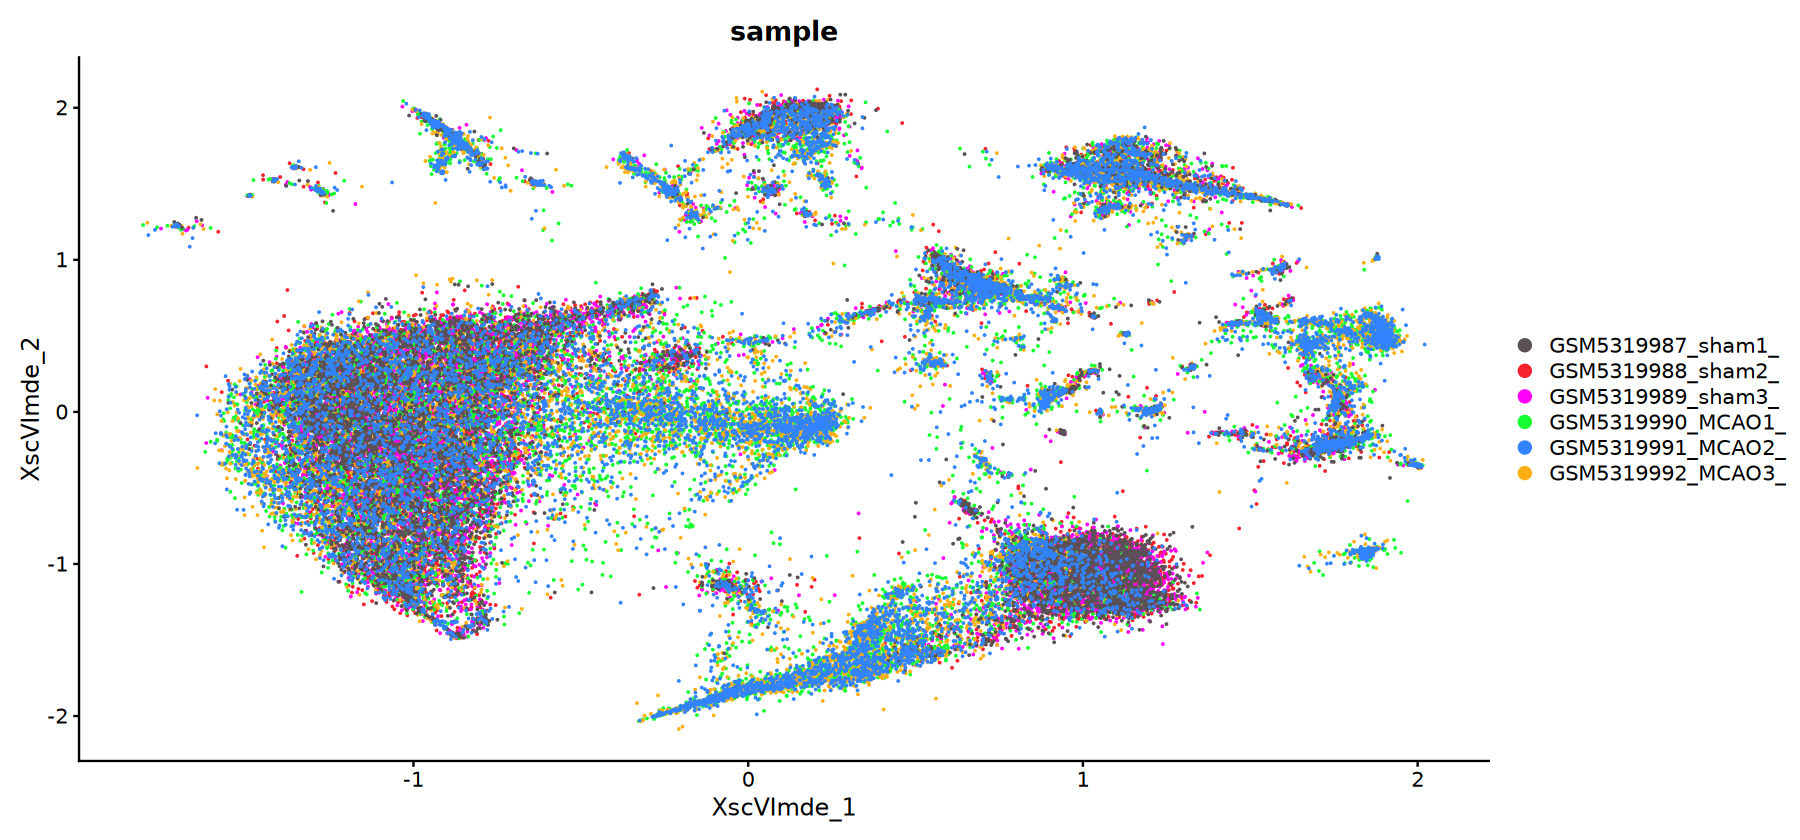

In [15]:
DimPlot(object = zheng_k_seurat, reduction = 'XscVImde_', group.by =  'sample', cols = my_colours)

In [16]:
zheng_k_seurat |> rownames() |> head()

[1] "Xkr4"    "Gm1992"  "Rp1"     "Sox17"   "Gm37323" "Mrpl15"

In [17]:
zheng_k_seurat |> saveRDS(here::here('r_objects', 'zheng_k_seurat.RDS'))

In [18]:
sessionInfo()

R version 4.4.2 (2024-10-31)
Platform: x86_64-unknown-linux-gnu
Running under: Red Hat Enterprise Linux 9.4 (Plow)

Matrix products: default
BLAS/LAPACK: /gnu/store/mj1kw87qd3m1q7r4844adkn5hifx8k6a-openblas-0.3.20/lib/libopenblasp-r0.3.20.so;  LAPACK version 3.9.0

locale:
 [1] LC_CTYPE=C          LC_NUMERIC=C        LC_TIME=C          
 [4] LC_COLLATE=C        LC_MONETARY=C       LC_MESSAGES=C.UTF-8
 [7] LC_PAPER=C          LC_NAME=C           LC_ADDRESS=C       
[10] LC_TELEPHONE=C      LC_MEASUREMENT=C    LC_IDENTIFICATION=C

time zone: Europe/Berlin
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] schard_0.0.1       Seurat_5.1.0       SeuratObject_5.0.2 sp_2.1-4          

loaded via a namespace (and not attached):
  [1] deldir_2.0-4           pbapply_1.7-2          gridExtra_2.3         
  [4] rlang_1.1.4            magrittr_2.0.3         RcppAnnoy_0.0.22      
  [7] spats